In [14]:
import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt 

In [ ]:
x = np.arange(0, 10.1, 0.1)
y = fuzz.trimf(x, [5,7,9])

In [ ]:
plt.plot(x,y)

plt.show()

In [6]:
import numpy as np
def trimf(x, abc):
    assert len(abc) == 3, 'abc parameter must have exactly three elements.'
    a, b, c = np.r_[abc]     # Zero-indexing in Python
    assert a <= b and b <= c, 'abc requires the three elements a <= b <= c.'

    y = np.zeros(len(x))

    # Left side
    if a != b:
        idx = np.nonzero(np.logical_and(a < x, x < b))[0]
        y[idx] = (x[idx] - a) / float(b - a)

    # Right side
    if b != c:
        idx = np.nonzero(np.logical_and(b < x, x < c))[0]
        y[idx] = (c - x[idx]) / float(c - b)

    idx = np.nonzero(x == b)
    y[idx] = 1
    return y


In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
from membership import trimf
x = np.arange(0, 10.1, 0.1)
y = trimf(x, [5,7,9])

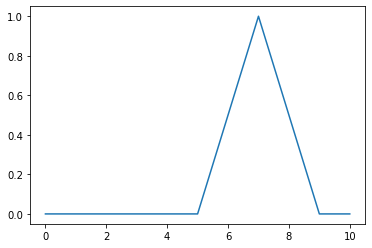

In [2]:
plt.plot(x,y)
plt.show()

In [20]:
def triangular_membership(x, vertex, middle, right):
    if x < vertex:
        return 0
    elif vertex <= x < middle:
        return (x - vertex) / (middle - vertex)
    elif middle <= x < right:
        return (right - x) / (right - middle)
    else:
        return 0


In [22]:
triangular_membership(2,1,3,5)

0.5

In [19]:
x,fuzz.trimf(x,[5,7,9])

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
         9.9, 10. ]),
 array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.

In [ ]:
def fuzzy_intersection(A, B):
    """
    Perform the intersection of two fuzzy sets.
    
    Parameters
    ----------
    A : numpy array
        The membership function of fuzzy set A.
    B : numpy array
        The membership function of fuzzy set B.
    
    Returns
    -------
    C : numpy array
        The membership function of the intersection of fuzzy sets A and B.
    """
    C = np.minimum(A, B)
    return C


In [ ]:
def fuzzy_union(A, B):
    def union(x):
        return min(1, max(A(x), B(x)))
    return union


In [ ]:
fuzzy_union(A,B)

In [ ]:
np.fmax(A,B)

In [ ]:
import numpy as np
import skfuzzy as fuzz

# Define the fuzzy sets
x = np.arange(0, 11, 1)
A = fuzz.trimf(x, [0, 0, 5])
B = fuzz.trimf(x, [0, 5, 10])

# Perform fuzzy logic operations
C = np.fmax(A, B)  # union
D = np.fmin(A, B)  # intersection
E = np.fabs(A - B)  # difference

# Plot the results
import matplotlib.pyplot as plt

plt.plot(x, A, 'b', label='A')
plt.plot(x, B, 'g', label='B')
plt.plot(x, C, 'r', label='C (A union B)')
plt.plot(x, D, 'c', label='D (A intersection B)')
plt.plot(x, E, 'm', label='E (A difference B)')
plt.legend()
plt.show()


In [ ]:
def triangular_membership_function(minimum, maximum, peak):
    def membership_function(x):
        if x < minimum or x > maximum:
            return 0
        elif x < peak:
            return (x - minimum) / (peak - minimum)
        else:
            return (maximum - x) / (maximum - peak)
    return membership_function


In [ ]:
triangular_membership_function(A,B,0)

In [ ]:
A,B,C

In [ ]:
fuzzy_intersection(A,B)
plt.plot(x,A)
plt.plot(x,B)

In [ ]:
import numpy as np

In [ ]:
def min(A, B):
    if A.shape[0] != B.shape[0]:
        print("Error: size of A does not equal size of B")
        return 0
    print(A, B, '\n')
    C = np.zeros((A.shape[0], B.shape[0]))
    for i in range(A.shape[0]):
        for j in range(B.shape[0]):
            if A[i] < B[j]:
                C[i][j] = A[i]
            if A[i] >= B[j]:
                C[i][j] = B[j]
        print(C[i])
    return C

In [ ]:
def max(A, B):
    if A.shape[0] != B.shape[0]:
        print("Error: size of A does not equal size of B")
        return 0
    print(A, B, '\n')
    C = np.zeros((A.shape[0], B.shape[0]))
    for i in range(A.shape[0]):
        for j in range(B.shape[0]):
            if A[i] > B[j]:
                C[i][j] = A[i]
            if A[i] <= B[j]:
                C[i][j] = B[j]
        print(C[i])
    return C


In [ ]:
def min_max(A, B):
    C = np.zeros(A.shape[0])
    for i in range(A.shape[0]):
        for j in range(B.shape[0]):
            if A[i] < B[i][j]:
                B[j][i] = A[i]
            if A[i] >= B[i][j]:
                continue
    B = np.rot90(B, 3)
    for i in range (C.shape[0]):
        print(B[i])
        C[i] = np.amax(B[i])
    print(C)
    return C

In [ ]:
from fuzzywuzzy import fuzz

# Fuzzy matching with the Ratio method
fuzz.ratio("this is a test", "this is a test!")  # Returns 100

In [ ]:
fuzz.ratio("this is a test", "this test a is") # Returns 100

In [ ]:
fuzz.ratio("this is a test", "this is a test.")  # Returns 90

In [ ]:
fuzz.ratio("this is a test", "this is test a") # Returns 90

In [ ]:
fuzz.ratio("this is a test", "this is a")  # Returns 86

In [ ]:
from fuzzywuzzy import fuzz

# Fuzzy matching with the Ratio method
string1 = "this is a test"
string2 = "this is a test!"

ratio = fuzz.ratio(string1, string2)
print(ratio)  # Output: 100


In [ ]:
len(string1),len(string2)

In [ ]:
string1[0:], string2[0:0]

In [ ]:
a = 'this is test'
b = 'test is this'
fuzz.ratio(a,b)

In [ ]:
14*100 , 15*100

In [ ]:
(14+15)

In [ ]:
14/100,15/100

In [ ]:
14